In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
dataset = pd.read_excel("Tank wise GL from 2018 to 2020.xlsx",sheet_name="Sheet1",usecols="B,E:G,J,K,M,N:P",header=0)

In [263]:
dataset.dropna(axis=0,inplace=True)

In [264]:
dataset.columns

Index(['Tank Cap', 'OP L15', 'RE L15', 'DE L15', 'LG L15', 'LG% L15',
       'Loss/(Gain) % L15', 'Product_Grade', 'Hot Months', 'Gain/Loss'],
      dtype='object')

In [265]:
zz = dataset[dataset["Product_Grade"]=="MS"]

In [266]:
X = zz.drop(columns=["Product_Grade","Gain/Loss","LG% L15","Loss/(Gain) % L15","LG L15"],axis=1)
y = zz["LG L15"]

In [267]:
np.corrcoef(zz["LG L15"],zz["Tank Cap"])

array([[1.        , 0.16527037],
       [0.16527037, 1.        ]])

In [268]:
np.corrcoef(zz["LG L15"],zz["OP L15"])

array([[1.        , 0.12907212],
       [0.12907212, 1.        ]])

In [269]:
np.corrcoef(zz["LG L15"],zz["RE L15"])

array([[1.        , 0.48892916],
       [0.48892916, 1.        ]])

In [270]:
np.corrcoef(zz["LG L15"],zz["DE L15"])

array([[1.        , 0.75127874],
       [0.75127874, 1.        ]])

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [272]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [273]:
predictions = lm.predict(X_test)

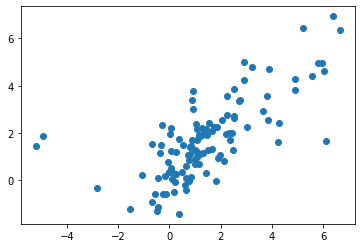

In [274]:
plt.scatter(y_test,predictions)

In [275]:
np.corrcoef(y_test,predictions)

array([[1.        , 0.71348341],
       [0.71348341, 1.        ]])

In [276]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

-0.5541594031232469


,Coefficient
Tank Cap,0.000133
OP L15,-0.000866
RE L15,0.000035
DE L15,0.002145
Hot Months,0.683505


In [277]:
from sklearn import metrics

In [278]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9813294774917166
MSE: 2.100962295768091
RMSE: 1.44946966017509


In [279]:
import statsmodels.api as sm

In [280]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LG L15   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     43.08
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.49e-27
Time:                        21:50:21   Log-Likelihood:                -272.29
No. Observations:                 159   AIC:                             556.6
Df Residuals:                     153   BIC:                             575.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4205      0.570     -0.738      0.4

In [281]:
datafr = pd.read_excel("TRECS India Plant Reports JAN 2018 TO AUG 2020.xlsx",sheet_name="IMC",header=0,usecols="D:O,R")

In [282]:
MS_filter = datafr["Product_Grade"].isin(["MS"])
HSD_filter = datafr["Product_Grade"].isin(["HSD"])

In [283]:
datafr[MS_filter].columns

Index(['TerminalProductCode', 'TerminalProductDesc', 'OpeningStock',
       'OpeningStockTemp', 'OpeningStockDensity', 'Receipt', 'Disposal',
       'ClosingStock', 'ClosingStockTemp', 'ClosingStockDensity', 'BookStock',
       'Gain', 'Product_Grade'],
      dtype='object')

In [284]:
datafr[MS_filter]

,TerminalProductCode,TerminalProductDesc,OpeningStock,OpeningStockTemp,OpeningStockDensity,Receipt,Disposal,ClosingStock,ClosingStockTemp,ClosingStockDensity,BookStock,Gain,Product_Grade
0,400004346,BF MS BSIV,1974538,32.00,737.4,0,160574.482,1814289,32.00,737.4,1813963.517,325.482,MS
1,400004346,BF MS BSIV,1064414,32.00,737.4,0,377876.023,686380,32.25,737.4,686537.976,-157.976,MS
2,400004346,BF MS BSIV,686380,32.25,737.4,0,315245.607,371069,32.50,737.4,371134.392,-65.392,MS
3,400004346,BF MS BSIV,1953728,31.00,736.4,0,0.000,1953588,31.00,736.4,1953728.000,-140.000,MS
4,400004346,BF MS BSIV,1953588,31.00,736.4,0,46965.097,1907107,31.00,736.4,1906622.902,484.097,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,400004346,BF MS BSIV,784568,32.75,735.4,0,189885.081,594776,32.50,735.4,594682.918,93.081,MS
4056,400004346,BF MS BSIV,594776,32.50,735.4,0,156599.145,438160,32.75,735.4,438176.854,-16.854,MS
4057,400004346,BF MS BSIV,1975720,33.25,735.5,384673,731204.506,1629121,33.00,733.5,1629188.493,-67.493,MS
4058,400004346,BF MS BSIV,187882,32.25,735.1,1087992,0.000,1276243,33.25,731.1,1275874.000,369.000,MS


In [292]:
xx=datafr[MS_filter].drop(columns=['TerminalProductCode', 'TerminalProductDesc','Product_Grade','ClosingStock','BookStock','Gain','OpeningStockTemp'],axis=1)
yy = datafr[MS_filter]['Gain']

In [293]:
xx = sm.add_constant(xx)
model = sm.OLS(yy,xx)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gain   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.91e-25
Time:                        22:23:10   Log-Likelihood:                -8140.2
No. Observations:                1155   AIC:                         1.629e+04
Df Residuals:                    1148   BIC:                         1.633e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 478.3047    

In [294]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(XX_train,yy_train)

LinearRegression()

In [295]:
_predictions = lm1.predict(XX_test)

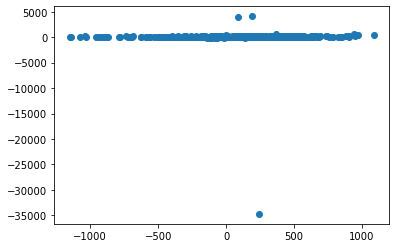

In [296]:
plt.scatter(yy_test,_predictions)

In [297]:
np.corrcoef(yy_test,_predictions)

array([[1.        , 0.00153845],
       [0.00153845, 1.        ]])

In [298]:
print(lm1.intercept_)
coeff_df1 = pd.DataFrame(lm1.coef_,xx.columns,columns=['Coefficient'])
coeff_df1

4623.919273293157


,Coefficient
const,0.000000
OpeningStock,-0.000023
OpeningStockDensity,-5.330597
Receipt,-0.000038
Disposal,0.000426
ClosingStockTemp,-11.060452
ClosingStockDensity,-0.398082
